In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
!ls "/content/drive/Shareddrives/PHÂN TÍCH DỮ LIỆU TRONG KINH DOANH/Final /Data/processed data/"


AttributeMapping.csv	       DayOfWeek.csv
BrandHealth.csv		       DayPart.csv
BrandImage.csv		       NeedstateDayPart.csv
City.csv		       Respondent.csv
Companion.csv		       Segmentation3685Case2017.csv
Competitor.csv		       Segmentation_Lookup.csv
Data_Dictionairy_Cleaned.xlsx


In [ ]:
import pandas as pd

file_path = "/content/drive/Shareddrives/PHÂN TÍCH DỮ LIỆU TRONG KINH DOANH/Final /Data/processed data/BrandImage.csv"

# Dùng latin-1 thay cho utf-8
data = pd.read_csv(file_path, encoding="cp1258", on_bad_lines="skip")

pd.set_option('display.max_columns', None)
print(data.head(10))



   BrandImageKey  RespondentID  Year  CityID  \
0           3877         92839  2017       2   
1           3878         92839  2017       2   
2           3879         92839  2017       2   
3           3880         92839  2017       2   
4           3881         92839  2017       2   
5           3882         92839  2017       2   
6           3883         92839  2017       2   
7           3884         92839  2017       2   
8           3885         92839  2017       2   
9           3886         92839  2017       2   

                              Attribute         Awareness  
0     Good place for working / studying         Phúc Long  
1                         Popular brand         Starbucks  
2                Quick speed of service         Phúc Long  
3                    Feel I belong here         Phúc Long  
4                        Friendly staff         Phúc Long  
5                     Good coffee taste         Phúc Long  
6  Comfortable and relaxing environment         Phú

Tần suất Attribute nào được gắn với thương hiệu nào nhiều nhất → yếu tố khiến khách hàng nhớ đến thương hiệu.

In [ ]:
import pandas as pd

# Bảng mapping
mapping = {
    "Clean": "Ambiance & Environment",
    "Comfortable and relaxing environment": "Ambiance & Environment",
    "Convenient location": "Service & Operations",
    "Delicious food": "Product Quality & Variety",
    "Diversified menu": "Product Quality & Variety",
    "Feel I belong here": "Brand Perception & Value",
    "Friendly staff": "Service & Operations",
    "Good coffee taste": "Product Quality & Variety",
    "Good ice-blended taste": "Product Quality & Variety",
    "Good music": "Ambiance & Environment",
    "Good other beverages (other than coffee	tea & ice-blended)": "Product Quality & Variety",
    "Good place for relaxing": "Ambiance & Environment",
    "Good place for socializing": "Social & Functional Purpose",
    "Good place for socializing with colleagues": "Social & Functional Purpose",
    "Good place for socializing with family": "Social & Functional Purpose",
    "Good place for socializing with friends": "Social & Functional Purpose",
    "Good place for studying": "Social & Functional Purpose",
    "Good place for working / business meeting": "Social & Functional Purpose",
    "Good place for working / studying": "Social & Functional Purpose",
    "Good tea taste": "Product Quality & Variety",
    "Good value for money": "Brand Perception & Value",
    "Have new product regularly": "Product Quality & Variety",
    "High speed of internet": "Service & Operations",
    "Nice environment design": "Ambiance & Environment",
    "Popular brand": "Brand Perception & Value",
    "Quick speed of service": "Service & Operations",
    "Recommended by others": "Brand Perception & Value",
    "Trusted brand": "Brand Perception & Value"
}

# Thêm cột GeneralizedAttribute vào data
data["GeneralizedAttribute"] = data["Attribute"].map(mapping)

print(data.head(10))


   BrandImageKey  RespondentID  Year  CityID  \
0           3877         92839  2017       2   
1           3878         92839  2017       2   
2           3879         92839  2017       2   
3           3880         92839  2017       2   
4           3881         92839  2017       2   
5           3882         92839  2017       2   
6           3883         92839  2017       2   
7           3884         92839  2017       2   
8           3885         92839  2017       2   
9           3886         92839  2017       2   

                              Attribute         Awareness  \
0     Good place for working / studying         Phúc Long   
1                         Popular brand         Starbucks   
2                Quick speed of service         Phúc Long   
3                    Feel I belong here         Phúc Long   
4                        Friendly staff         Phúc Long   
5                     Good coffee taste         Phúc Long   
6  Comfortable and relaxing environment     

/tmp/ipython-input-3581034344.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hl_freq, x="Count", y="GeneralizedAttribute", palette="viridis")


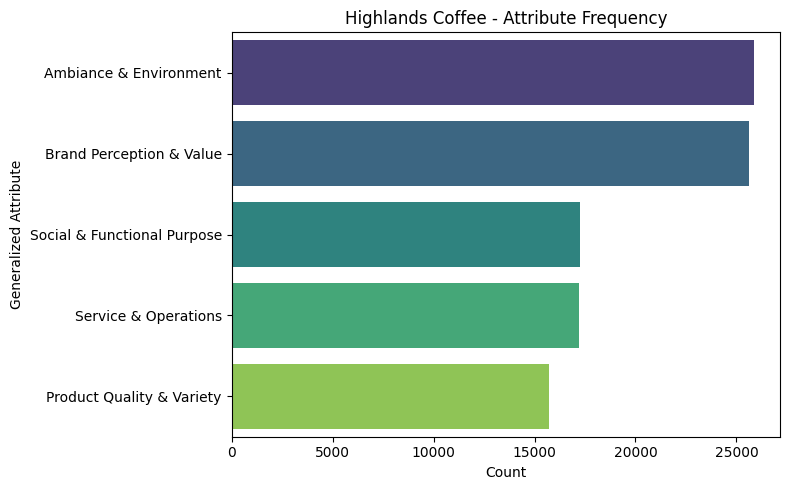

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lọc riêng Highlands Coffee
hl_data = data[data["Awareness"] == "Highlands Coffee"]

# Đếm tần suất các nhóm attribute
hl_freq = (
    hl_data.groupby("GeneralizedAttribute")
    .size()
    .reset_index(name="Count")
    .sort_values("Count", ascending=False)
)

# Vẽ biểu đồ cột
plt.figure(figsize=(8,5))
sns.barplot(data=hl_freq, x="Count", y="GeneralizedAttribute", palette="viridis")
plt.title("Highlands Coffee - Attribute Frequency")
plt.xlabel("Count")
plt.ylabel("Generalized Attribute")
plt.tight_layout()
plt.show()


In [ ]:
# Tạo mapping cụ thể cho từng trường hợp
replace_map = {
    "C?ng Cà Phê": "Cộng Cà Phê",
    "Ph?c Long": "Phúc Long",
    "Trung Nguy?n": "Trung Nguyên",
    "?en ?á": "Đen Đá",
    "M?c Miên": "Mộc Miên",
    "Th?c Coffee": "Thức Coffee"
}

# Thay thế dựa theo mapping
data["Awareness"] = data["Awareness"].replace(replace_map, regex=False)

# Nếu trong GeneralizedAttribute cũng có lỗi dấu ? thì làm thêm
data["GeneralizedAttribute"] = data["GeneralizedAttribute"].replace(replace_map, regex=False)


<Figure size 1200x600 with 0 Axes>

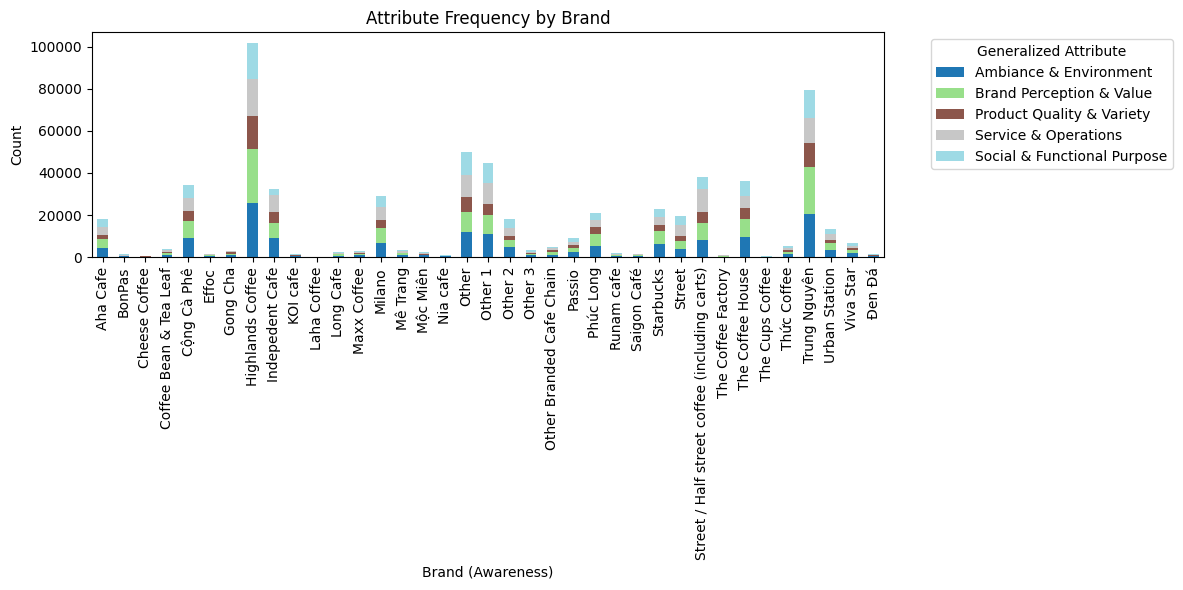

In [ ]:

# Đếm tần suất toàn bộ thương hiệu
all_freq = (
    data.groupby(["Awareness", "GeneralizedAttribute"])
    .size()
    .reset_index(name="Count")
)

# Vẽ stacked bar chart
plt.figure(figsize=(12,6))
all_freq_pivot = all_freq.pivot(index="Awareness", columns="GeneralizedAttribute", values="Count").fillna(0)

all_freq_pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(12,6),
    colormap="tab20"
)

plt.title("Attribute Frequency by Brand")
plt.xlabel("Brand (Awareness)")
plt.ylabel("Count")
plt.legend(title="Generalized Attribute", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()


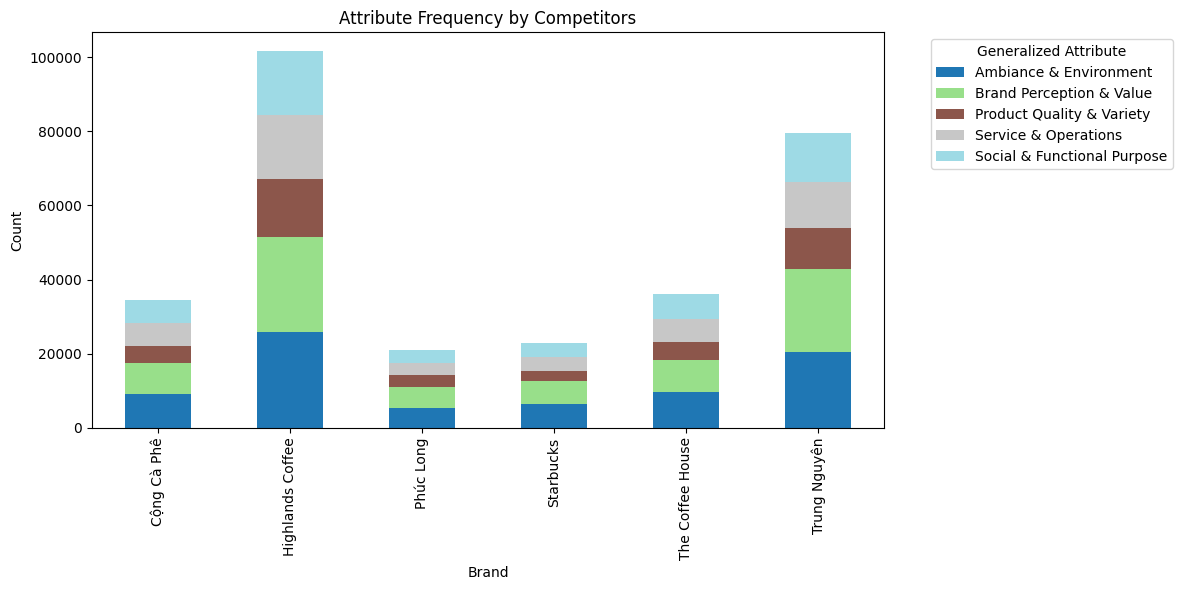

In [ ]:
# Danh sách thương hiệu quan tâm
selected_brands = [
    "Cộng Cà Phê",
    "Highlands Coffee",
    "Phúc Long",
    "Starbucks",
    "The Coffee House",
    "Trung Nguyên"
]

# Lọc data
filtered = data[data["Awareness"].isin(selected_brands)]

# Đếm tần suất
all_freq = (
    filtered.groupby(["Awareness", "GeneralizedAttribute"])
    .size()
    .reset_index(name="Count")
)

# Pivot để vẽ stacked bar chart
all_freq_pivot = all_freq.pivot(index="Awareness", columns="GeneralizedAttribute", values="Count").fillna(0)

# Vẽ stacked bar
all_freq_pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(12,6),
    colormap="tab20"
)

plt.title("Attribute Frequency by Competitors")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.legend(title="Generalized Attribute", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()


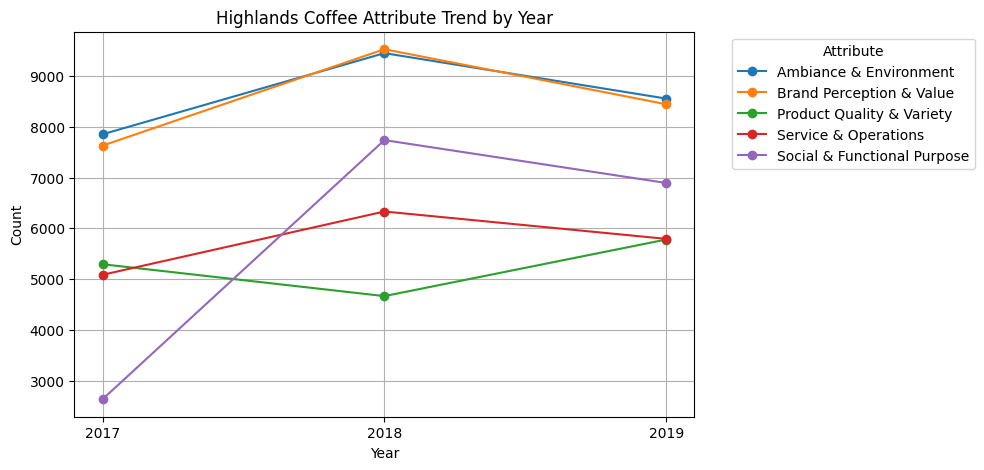

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ép Year về số nguyên, bỏ NaN
data['Year'] = pd.to_numeric(data['Year'], errors='coerce').dropna().astype(int)

# Đếm tần suất Attribute theo Năm và Thương hiệu
attr_trend = (
    data.groupby(['Year', 'Awareness', 'GeneralizedAttribute'])
    .size()
    .reset_index(name='Count')
)

# Lọc Highlands Coffee
highlands = attr_trend[attr_trend['Awareness'] == 'Highlands Coffee']

# Pivot
pivot_hl = highlands.pivot(index='Year', columns='GeneralizedAttribute', values='Count').fillna(0)
pivot_hl = pivot_hl.sort_index()

# Vẽ
plt.figure(figsize=(8,5))
for col in pivot_hl.columns:
    plt.plot(pivot_hl.index, pivot_hl[col], marker='o', label=col)

plt.title("Highlands Coffee Attribute Trend by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks([2017, 2018, 2019])  # chỉ hiện đúng 3 năm
plt.legend(title="Attribute", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

file_path = "/content/drive/Shareddrives/PHÂN TÍCH DỮ LIỆU TRONG KINH DOANH/Final /Data/processed data/Competitor.csv"

# Dùng latin-1 thay cho utf-8
data1 = pd.read_csv(file_path, encoding="cp1258", on_bad_lines="skip")

pd.set_option('display.max_columns', None)
print(data1.head(10))

   CompetitorKey             Brand  CityID  Year  StoreCount  dwh_create_date
0              1       C?ng Cà Phê       3  2017           0  9/19/2025 15:02
1              2       C?ng Cà Phê       5  2017           2  9/19/2025 15:02
2              3       C?ng Cà Phê       4  2017           1  9/19/2025 15:02
3              4       C?ng Cà Phê       2  2017           8  9/19/2025 15:02
4              5       C?ng Cà Phê       6  2017           1  9/19/2025 15:02
5              6  Highlands Coffee       3  2017           4  9/19/2025 15:02
6              7  Highlands Coffee       5  2017          15  9/19/2025 15:02
7              8  Highlands Coffee       4  2017           9  9/19/2025 15:02
8              9  Highlands Coffee       2  2017          85  9/19/2025 15:02
9             10  Highlands Coffee       6  2017           5  9/19/2025 15:02


In [ ]:
# Tạo mapping cụ thể cho từng trường hợp
replace_map = {
    "C?ng Cà Phê": "Cộng Cà Phê",
    "Ph?c Long": "Phúc Long",
    "Trung Nguy?n": "Trung Nguyên",
    "?en ?á": "Đen Đá",
    "M?c Miên": "Mộc Miên",
    "Th?c Coffee": "Thức Coffee"
}

# Thay thế dựa theo mapping
data1["Brand"] = data1["Brand"].replace(replace_map, regex=False)
print(data1.head(10))

   CompetitorKey             Brand  CityID  Year  StoreCount  dwh_create_date
0              1       Cộng Cà Phê       3  2017           0  9/19/2025 15:02
1              2       Cộng Cà Phê       5  2017           2  9/19/2025 15:02
2              3       Cộng Cà Phê       4  2017           1  9/19/2025 15:02
3              4       Cộng Cà Phê       2  2017           8  9/19/2025 15:02
4              5       Cộng Cà Phê       6  2017           1  9/19/2025 15:02
5              6  Highlands Coffee       3  2017           4  9/19/2025 15:02
6              7  Highlands Coffee       5  2017          15  9/19/2025 15:02
7              8  Highlands Coffee       4  2017           9  9/19/2025 15:02
8              9  Highlands Coffee       2  2017          85  9/19/2025 15:02
9             10  Highlands Coffee       6  2017           5  9/19/2025 15:02


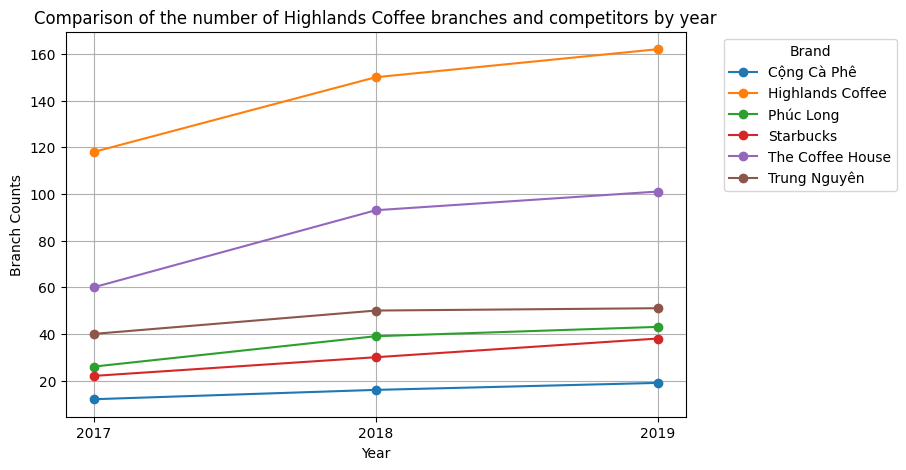

In [ ]:
# Ép Year về số nguyên, bỏ NaN
data1['Year'] = pd.to_numeric(data1['Year'], errors='coerce').dropna().astype(int)

# Gom tổng StoreCount theo Brand và Year
summary = data1.groupby(["Year","Brand"])["StoreCount"].sum().reset_index()

# Vẽ biểu đồ đường
plt.figure(figsize=(8,5))
for brand in summary["Brand"].unique():
    brand_data = summary[summary["Brand"] == brand]
    plt.plot(brand_data["Year"], brand_data["StoreCount"], marker="o", label=brand)

plt.title("Comparison of the number of Highlands Coffee branches and competitors by year")
plt.xlabel("Year")
plt.ylabel("Branch Counts")
plt.xticks([2017, 2018, 2019])  # chỉ hiện đúng 3 năm
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
# Bảng mapping CityID -> CityName
city_map = {
    3: "Cần Thơ",
    5: "Đà Nẵng",
    1: "Hà Nội",
    4: "Hải Phòng",
    2: "Hồ Chí Minh",
    6: "Nha Trang"
}

# Lọc Highlands Coffee
highlands = data1[data1["Brand"] == "Highlands Coffee"].copy()

# Thêm tên thành phố
highlands["CityName"] = highlands["CityID"].map(city_map)

# Tính tổng số cửa hàng theo City
result = highlands.groupby("CityName")["StoreCount"].sum().reset_index()

print(result)

      CityName  StoreCount
0      Cần Thơ          14
1    Hải Phòng          36
2  Hồ Chí Minh         302
3    Nha Trang          24
4      Đà Nẵng          54


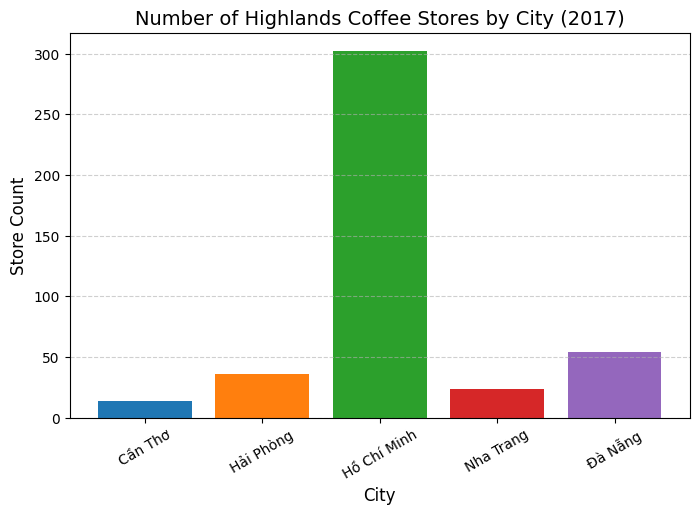

In [ ]:
# Vẽ lại biểu đồ cột với nhiều màu
plt.figure(figsize=(8,5))
colors = plt.cm.tab10.colors  # Lấy bảng màu có sẵn

plt.bar(result["CityName"], result["StoreCount"], color=colors[:len(result)])

plt.title("Number of Highlands Coffee Stores by City (2017)", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Store Count", fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

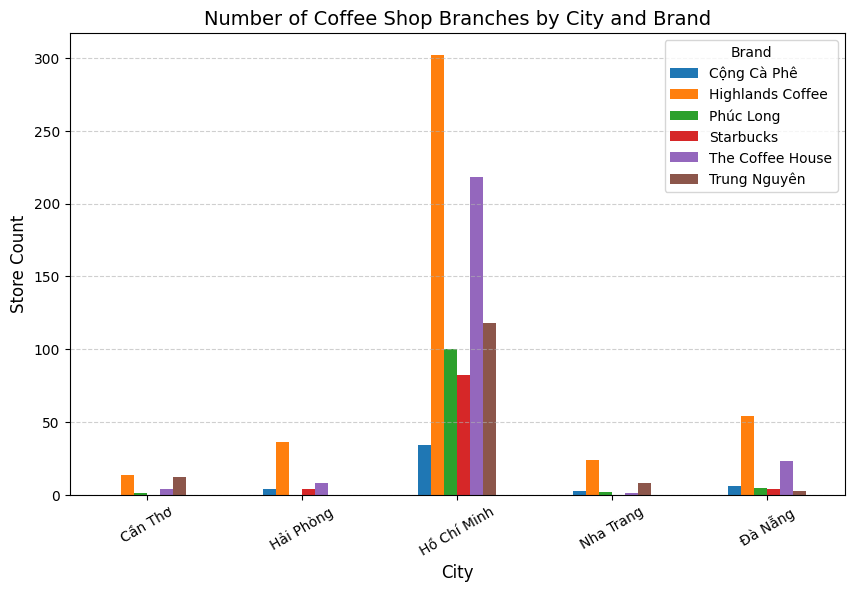

In [ ]:
data1["CityName"] = data1["CityID"].map(city_map)

# Gom tổng số cửa hàng theo City và Brand
summary = data1.groupby(["CityName", "Brand"])["StoreCount"].sum().reset_index()

# Pivot để vẽ biểu đồ dễ hơn
pivot_table = summary.pivot(index="CityName", columns="Brand", values="StoreCount").fillna(0)

# Vẽ biểu đồ cột nhóm
pivot_table.plot(kind="bar", figsize=(10,6))

plt.title("Number of Coffee Shop Branches by City and Brand", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Store Count", fontsize=12)
plt.xticks(rotation=30)
plt.legend(title="Brand")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()